In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

In [3]:
df = pd.read_excel('./data/default_of_credit_card_clients__courseware_version_1_21_19.xls')

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.shape

(30000, 25)

In [6]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

## Data Cleaning

In [8]:
# total unique rows in the dataset
df['ID'].nunique()

29687

In [13]:
# total rows in the dataset
df['ID'].shape

(30000,)

In [15]:
# count of the duplicate and unique values
id_counts = df['ID'].value_counts()
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

In [16]:
# storing the dup as a mask to filter the duplicate rows
dup = id_counts == 2
dup[:5]

062f1fe4-9a66    True
54ada30b-750f    True
249b09c0-f4c7    True
1c7af562-f271    True
31d0095f-75bc    True
Name: ID, dtype: bool

In [20]:
# the values of the mask can be indexed
id_counts.index[:5]

Index(['062f1fe4-9a66', '54ada30b-750f', '249b09c0-f4c7', '1c7af562-f271',
       '31d0095f-75bc'],
      dtype='object')

In [22]:
# filtering out the duplicate rows
dup_ids = id_counts.index[dup]
dup_ids = list(dup_ids)
len(dup_ids)

313

In [23]:
# duplicate rows
dup_ids

['062f1fe4-9a66',
 '54ada30b-750f',
 '249b09c0-f4c7',
 '1c7af562-f271',
 '31d0095f-75bc',
 '73ed1381-3a3f',
 '61ae560c-4479',
 'f5e3478e-cf68',
 '42009c72-651f',
 '3884eeca-7714',
 '6ff744d5-91f0',
 '8b62a9c9-7b64',
 '85bd7f39-2e9b',
 '62608fd2-d7fb',
 '0d624cb8-e5f8',
 'dd019fd7-f591',
 'ff619017-560f',
 '3393c9e4-3345',
 'd9dafe9c-b497',
 '7b6e060a-97a0',
 '9d3d2a55-dab6',
 '5f483bdb-3aaf',
 '84dc097a-dee3',
 'e4936e97-da48',
 '72598524-ef0b',
 '05009844-7be8',
 '91321f74-e4a4',
 'e8bcb1bb-456e',
 '0170086d-7472',
 'c5368117-b498',
 '1d58344c-5793',
 '9878723a-0b58',
 'f63d8fbe-d79e',
 '994330b6-eeec',
 '01355f46-3f0b',
 '2189fc56-f82a',
 '129c43ca-42ee',
 '56126c14-b5b8',
 '27e04c06-487f',
 '8d3a2576-a958',
 'dda76366-a407',
 'ae6a7eed-bb58',
 '7fe414ae-32f8',
 'effb69b1-d4d8',
 '428b26a3-dca2',
 '20b16b21-8b23',
 '64fe3b96-7ed0',
 'f31d1048-5fa9',
 '94d59251-fa7f',
 '0a2dceda-b597',
 'a3e05a29-d6df',
 '3fd4854f-8752',
 'a3a5c0fc-fdd6',
 'b4937915-ad67',
 'dab579ee-1645',
 'edd737fd

In [24]:
df.loc[df['ID'].isin(dup_ids),:].head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
141,26bde6da-f148,180000,1,2,2,28,-1,-1,-1,-1,...,332,416,416,0,416,332,500,3500,832,0
196,42009c72-651f,150000,2,2,1,34,-2,-2,-2,-2,...,116,0,1500,0,0,116,0,1500,0,0
241,26bde6da-f148,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,42009c72-651f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
323,73ed1381-3a3f,230000,2,2,1,28,0,0,0,-2,...,2100,767,6173,1710,1100,1000,767,6173,1000,1


In [26]:
df.loc[296]

ID                            42009c72-651f
LIMIT_BAL                                 0
SEX                                       0
EDUCATION                                 0
MARRIAGE                                  0
AGE                                       0
PAY_1                                     0
PAY_2                                     0
PAY_3                                     0
PAY_4                                     0
PAY_5                                     0
PAY_6                                     0
BILL_AMT1                                 0
BILL_AMT2                                 0
BILL_AMT3                                 0
BILL_AMT4                                 0
BILL_AMT5                                 0
BILL_AMT6                                 0
PAY_AMT1                                  0
PAY_AMT2                                  0
PAY_AMT3                                  0
PAY_AMT4                                  0
PAY_AMT5                        

### Looks like some rows have only zero values which is useless,
### we will remove those rows

In [27]:
zero_mask = df == 0
zero_mask

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,True
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


In [29]:
all_zeros = zero_mask.iloc[:,1:].all(axis=1)

In [30]:
sum(all_zeros)

315

In [31]:
df_cleaned = df.loc[~all_zeros,:].copy()
df_cleaned.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [33]:
df_cleaned['ID'].nunique()

29685

In [34]:
df_cleaned.shape

(29685, 25)

In [35]:
# checking the columns of the data
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

In [38]:
df_cleaned['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [40]:
# removing the rows which have values not available
df_cleaned = df_cleaned.loc[df_cleaned['PAY_1'] != 'Not available']

In [41]:
df_cleaned.shape

(26664, 25)

In [42]:
df_cleaned['PAY_1'].value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [43]:
# convert the column to integer
df_cleaned['PAY_1'] = df_cleaned['PAY_1'].astype('int64')

In [44]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

## EDA

In [45]:
df_cleaned.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

<AxesSubplot:>

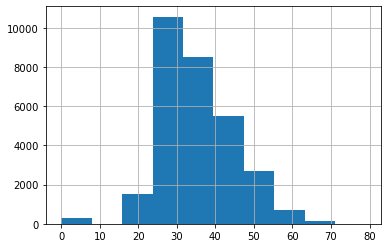

In [46]:
df['AGE'].hist()

<AxesSubplot:>

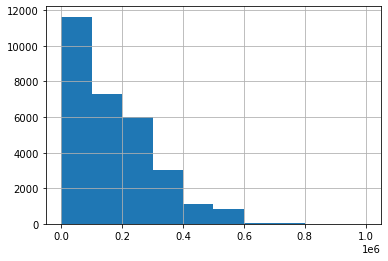

In [49]:
df['LIMIT_BAL'].hist()

In [50]:
df_cleaned.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,...,26664.000000,26664.000000,26664.000000,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,167919.054905,1.603060,1.853098,1.550630,35.505213,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,...,43338.894539,40338.136701,38889.872337,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047,0.221797
std,129839.453081,0.489272,0.789364,0.522015,9.227442,1.126769,1.198640,1.199165,1.167897,1.131735,...,64275.250740,60705.944083,59432.541657,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185,0.415463
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2341.750000,1745.000000,1256.000000,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19037.000000,18066.000000,17005.000000,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54727.500000,50290.500000,49253.750000,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,706864.000000,823540.000000,699944.000000,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000,1.000000


In [51]:
df_cleaned['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

### Given
- 1 - Graduate
- 2 - University
- 3 - High School
- 4 - Others
No value available for 0,5,6
Lets fill 0,5,6 as 4

In [53]:
df_cleaned['EDUCATION'].replace(to_replace=[0,5,6],value=4, inplace=True)

In [54]:
df_cleaned['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [55]:
df['MARRIAGE'].value_counts()

2    15810
1    13503
0      369
3      318
Name: MARRIAGE, dtype: int64

### Marriage values
- 1 - Married
- 2 - Single
- 3 - Others

will merge 0 value with 3 value

In [56]:
df['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)

In [57]:
df['MARRIAGE'].value_counts()

2    15810
1    13503
3      687
Name: MARRIAGE, dtype: int64

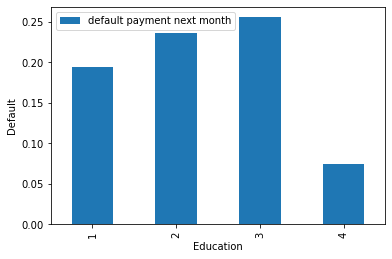

In [68]:
    df_cleaned.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar()
    plt.xlabel('Education')
    plt.ylabel('Default')
    plt.show()

In [69]:
edu_cat={
    1:'graduate',
    2:'university',
    3:'high_school',
    4:'others',
}

In [71]:
df_cleaned['EDUCATION_CAT'] = df_cleaned['EDUCATION'].map(edu_cat)

In [73]:
df_cleaned['EDUCATION_CAT'].value_counts()

university     12458
graduate        9412
high_school     4380
others           414
Name: EDUCATION_CAT, dtype: int64

In [74]:
edu_ohe = pd.get_dummies(df_cleaned['EDUCATION_CAT'])

In [75]:
edu_ohe.head()

,graduate,high_school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [78]:
# cleaned final data after cleaning and eda
df = pd.concat([df_cleaned, edu_ohe], axis=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate,high_school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [79]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate',
       'high_school', 'others', 'university'],
      dtype='object')

In [82]:
df[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [84]:
df['PAY_1'].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

<AxesSubplot:>

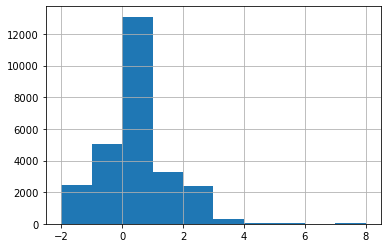

In [85]:
df['PAY_1'].hist()

In [94]:
bin_edges = np.arange(-2.5,9,1)
bin_edges

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

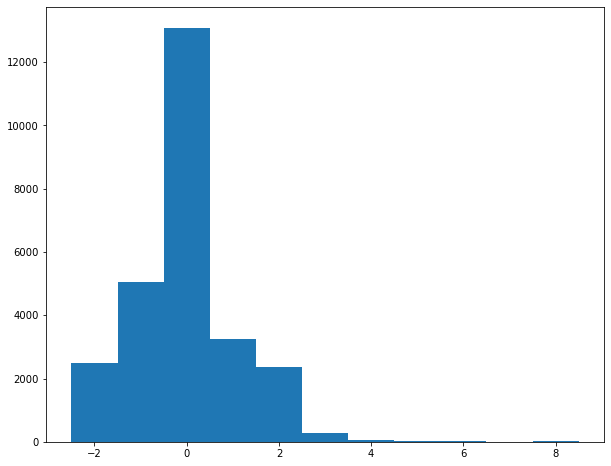

In [100]:
# df[['PAY_1']].hist(bins=bin_edges, layout=(2,3))
plt.figure(figsize=(10,8))
plt.hist(df[['PAY_1']], bins=bin_edges)
plt.show()